## 빅데이터 실습

### 제주도 핫플레이스 웹크롤링

#### 셀레니움 사용

In [82]:
# 셀레니움 사용 등록
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import unicodedata
import re # 정규식 처리 모듈
from selenium.webdriver.common.by import By


#### 인스타그램 접속

In [42]:
driver = webdriver.Chrome()
url = 'https://www.instagram.com'
driver.get(url=url)
time.sleep(2)

#### 자동 로그인 
- 로그인 화면, 아이디 ,패스워드 입력하는 html name 속성이 생김

In [49]:
email = '이메일'
input_id = driver.find_element(By.NAME,'username')
input_id.clear()
input_id.send_keys(email)

password = '비밀번호'
input_pw = driver.find_element(By.NAME,'password')
input_pw.clear()
input_pw.send_keys(password)

input_pw.submit()
time.sleep(2.0)

In [8]:
# 검색한 단어로 태그 검색하기 단 태그는 30개 이상의 게시물을 보여주지 않음
def insta_seraching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url


In [57]:
## 부산놀자 게시글로 검색
driver.get('https://www.instagram.com/busansomang/')
time.sleep(3.0)




In [60]:
# 첫번째 게시물 클릭
first = driver.find_element(By.CLASS_NAME,'_aagw')
first.click()
time.sleep(2)

In [ ]:
## 게시글 정보 가져오기 함수
def getContent(driver):
    pass

In [211]:
## 1. 게시글 정보 가져오기 로직
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup
# 1. 팝업 본문 내용 가져오기
content = soup.select('div.x9f619')[0].text

# content
## 1.5 팝업 본문 내용 가게명 가져오기
#content = soup.select('div.x4h1yfo')[0].text
# 가게명 명시가 형식이 정해져있지 않아 가져올 수 없음

# 2. 팝업 본문 주소 가져오기
#



# 3. 본문에서 태그 가져오기
tags = re.findall(r'#[^\s#,\\n]+',content)
tags

## 4. 작성 일자 가져오기
date = soup.select('time')[0]['datetime'][:10]
date

# ## 5. 좋아요 수 가져오기
like = soup.select('section.x12nagc')[0].text[4:-1]
like

'106'

#### 워드 클라우드
- 태그 중에서 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 작게 표현해서 마치 구름처럼 나타내는 기법

In [3]:
## 판다스 필요 라이브러리 사용등록
import pandas as pd

In [ ]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

In [ ]:
##
raw_total['tags'][0][2:-2].split("', '")

In [18]:
## tqdm 모듈 사용
from tqdm import  tqdm

In [34]:
tagAllList = []

for tags in tqdm(raw_total['tags']): ## 8800개 반복
    tagList = tags[2:-2].split("', '") #다시 리스트로
    for tag in tagList: #개수가 유동적
        tagAllList.append(tag)

100%|██████████| 8801/8801 [00:00<00:00, 259006.11it/s]


In [37]:
len(tagAllList)

149495

In [ ]:
## 해시태그 출현 빈도

In [32]:
from collections import Counter

In [41]:
tagCounts = Counter(tagAllList)

In [ ]:
tagCounts.most_common(50)

In [165]:
## 맛집 이외의 해시태그는 제외 , 워드클라우드 결과보고 다시 해시태그 추가, 정제한 뒤 실행해야할 필요가 있을수도 있음
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신', 
             '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주살이', '#여행스타그램',
             '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신', '#서귀포남자눈썹문신', '#서귀포자연눈썹',
             '#제주남자눈썹문신', '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#소통', '#맞팔', '#제주메이크업',
             '#daily', '#가족여행', '#jejuisland', '#제주속눈썹연장', '#제주해안도로', '#셀카', '#제주공항',
             '#서귀포문신', '#데일리', '#제주문신','#제주눈썹문신']

In [166]:
tagFilterList = []

for tag in tagAllList:
    if tag not in STOPWORDS:
        tagFilterList.append(tag)

In [ ]:
tagFilterCount = Counter(tagFilterList)
tagFilterCount.most_common(50)

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams,font_manager,rc
import matplotlib
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

In [60]:
sns.set_style('dark')

In [70]:
dfTagCounts = pd.DataFrame(tagFilterCount.most_common(30))

In [168]:
dfTagCounts.columns = ['tag','counts']

In [76]:
import warnings
warnings.filterwarnings('ignore')

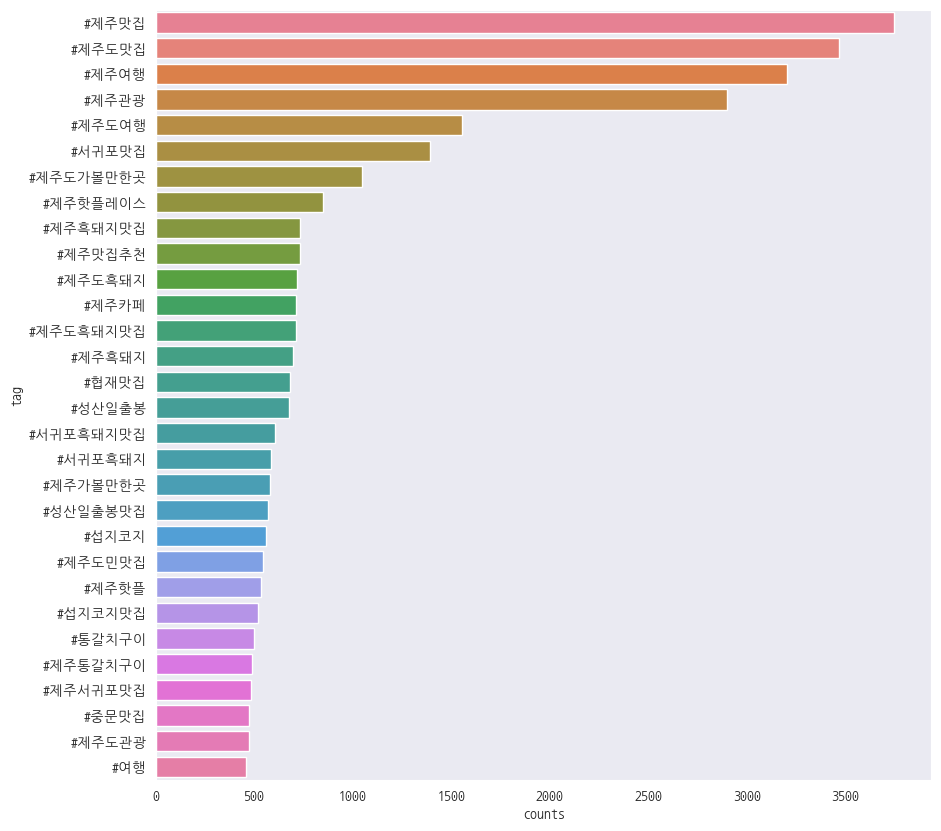

In [169]:
plt.figure(figsize=(10,10))
## platte = 'pastel' , 'husl','Set1~3','Paired,'rocket,mako
sns.barplot(x='counts',y='tag',data=dfTagCounts,palette='husl')
plt.show()

####
```python
!pip install wordcloud
```

In [ ]:
#!pip install wordcloud

In [180]:
from wordcloud import WordCloud
import numpy as np
from PIL import  Image,ImageOps

In [171]:
import platform
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'


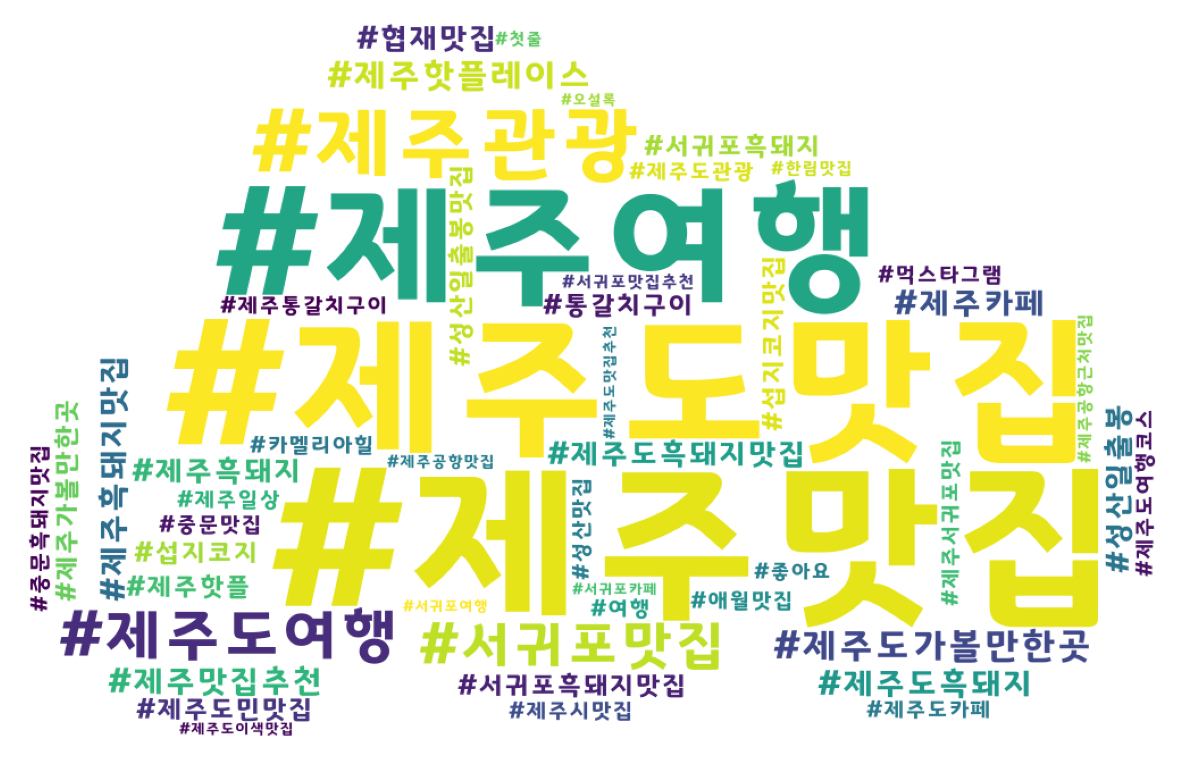

In [194]:
#워드 클라우드 만들기
tagsLast = dict(tagFilterCount.most_common(50))
mask = np.array(Image.open('../images/cloud.png'))
mask[mask.sum(axis=2) == 0] = 255 #마스크 이미지를 여백이 255가 되도록 변환
wordcloud = WordCloud(font_path=font_path,background_color='white',max_words=100,
                      mask=mask,
                    relative_scaling=0.4,width=1000,height=600).generate_from_frequencies(tagsLast)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off') #x,y좌표 숨김
plt.savefig('./data/제주맛집_워드클라우드.png') #이미지 파일 저장
plt.show()


#### 글자체 변경
경기천년체 https://www.gg.go.kr/contents/contents.do?ciIdx=679&menuId=2457

#### 지도 시각화
- Folium 사용

##### 주소에 대한 위경도
- 카카오 검색 API